# Data Loading

## Reading dataset

In [1]:
import pandas as pd
import numpy as np

In [4]:
# Load without header
df_no_header = pd.read_csv('sample_data.csv', header=None)
df_no_header

,0,1,2,3
0,name,age,city,salary
1,Alice,30,New York,70000
2,Bob,25,Los Angeles,65000
3,Charlie,35,Chicago,80000
4,David,40,Houston,75000
5,Eva,28,San Francisco,72000


In [5]:
# Load using first row as header
df_with_header = pd.read_csv('sample_data.csv', header=0)
df_with_header

,name,age,city,salary
0,Alice,30,New York,70000
1,Bob,25,Los Angeles,65000
2,Charlie,35,Chicago,80000
3,David,40,Houston,75000
4,Eva,28,San Francisco,72000


# Print first few entries

In [6]:
# n=number of entries; default 5
df_with_header.head(3)


,name,age,city,salary
0,Alice,30,New York,70000
1,Bob,25,Los Angeles,65000
2,Charlie,35,Chicago,80000


## Print last few entries

In [7]:
# n=number of entries; default 5
df_with_header.tail(3)


,name,age,city,salary
2,Charlie,35,Chicago,80000
3,David,40,Houston,75000
4,Eva,28,San Francisco,72000


# Assign header names

In [8]:
headers = ['name', 'age', 'city', 'salary']
df_no_header.columns = headers
df_no_header

,name,age,city,salary
0,name,age,city,salary
1,Alice,30,New York,70000
2,Bob,25,Los Angeles,65000
3,Charlie,35,Chicago,80000
4,David,40,Houston,75000
5,Eva,28,San Francisco,72000


# Replace "!" with NaN

In [47]:
# Suppose there was a column with "?" values, we replace them
df_with_header.replace("!", np.nan, inplace=True)
df_with_header

,employee_name,age,city,salary,age_group
0,Alice,30,New York,0.875000,Young
1,Bob,25,Los Angeles,0.928125,Young
2,Charlie,35,New York,1.000000,Middle-aged
3,David,40,Houston,0.937500,Old
4,Eva,28,San Francisco,0.900000,Young


# Data types

In [10]:
df_with_header.dtypes


name      object
age        int64
city      object
salary     int64
dtype: object

# Statistical Summary

In [11]:
df_with_header.describe()

,age,salary
count,5.00000,5.000000
mean,31.60000,72400.000000
std,5.94138,5594.640292
min,25.00000,65000.000000
25%,28.00000,70000.000000
50%,30.00000,72000.000000
75%,35.00000,75000.000000
max,40.00000,80000.000000


In [12]:
df_with_header.describe(include="all")

,name,age,city,salary
count,5,5.00000,5,5.000000
unique,5,NaN,5,NaN
top,Alice,NaN,New York,NaN
freq,1,NaN,1,NaN
mean,NaN,31.60000,NaN,72400.000000
std,NaN,5.94138,NaN,5594.640292
min,NaN,25.00000,NaN,65000.000000
25%,NaN,28.00000,NaN,70000.000000
50%,NaN,30.00000,NaN,72000.000000
75%,NaN,35.00000,NaN,75000.000000


# Dataset Summary

In [13]:
df_with_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5 non-null      object
 1   age     5 non-null      int64 
 2   city    5 non-null      object
 3   salary  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


# Save data frame to csv

In [14]:
df_with_header.to_csv('output_sample_data.csv', index=False)


# Data Wrangling

## Replace missing data with Most Frequent Item

In [15]:
df_with_header.loc[2, 'city'] = np.nan

MostFrequentEntry = df_with_header['city'].value_counts().idxmax()
df_with_header['city'].replace(np.nan, MostFrequentEntry, inplace=True)
df_with_header


,name,age,city,salary
0,Alice,30,New York,70000
1,Bob,25,Los Angeles,65000
2,Charlie,35,New York,80000
3,David,40,Houston,75000
4,Eva,28,San Francisco,72000


##  Replace missing data with Mean 

In [16]:
df_with_header.loc[1, 'salary'] = np.nan

AverageValue = df_with_header['salary'].astype(float).mean(axis=0)
df_with_header['salary'].replace(np.nan, AverageValue, inplace=True)
df_with_header


,name,age,city,salary
0,Alice,30,New York,70000.0
1,Bob,25,Los Angeles,74250.0
2,Charlie,35,New York,80000.0
3,David,40,Houston,75000.0
4,Eva,28,San Francisco,72000.0


## Fix the data types

In [17]:
df_with_header[['age', 'salary']] = df_with_header[['age', 'salary']].astype(int)
df_with_header.dtypes

name      object
age        int32
city      object
salary     int32
dtype: object

## Data normalization

In [18]:
df_with_header['salary'] = df_with_header['salary'] / df_with_header['salary'].max()
df_with_header

,name,age,city,salary
0,Alice,30,New York,0.875000
1,Bob,25,Los Angeles,0.928125
2,Charlie,35,New York,1.000000
3,David,40,Houston,0.937500
4,Eva,28,San Francisco,0.900000


## Binning

In [19]:
bins = np.linspace(min(df_with_header['age']), max(df_with_header['age']), 4)
GroupNames = ['Young', 'Middle-aged', 'Old']

df_with_header['age_group'] = pd.cut(df_with_header['age'], bins, labels=GroupNames, include_lowest=True)
df_with_header


,name,age,city,salary,age_group
0,Alice,30,New York,0.875000,Young
1,Bob,25,Los Angeles,0.928125,Young
2,Charlie,35,New York,1.000000,Middle-aged
3,David,40,Houston,0.937500,Old
4,Eva,28,San Francisco,0.900000,Young


## Change Column Name 

In [20]:
df_with_header.rename(columns={'name': 'employee_name'}, inplace=True)
df_with_header

,employee_name,age,city,salary,age_group
0,Alice,30,New York,0.875000,Young
1,Bob,25,Los Angeles,0.928125,Young
2,Charlie,35,New York,1.000000,Middle-aged
3,David,40,Houston,0.937500,Old
4,Eva,28,San Francisco,0.900000,Young


## Indicator variables

In [21]:
dummy_variables = pd.get_dummies(df_with_header['city'])
df_with_dummies = pd.concat([df_with_header, dummy_variables], axis=1)
df_with_dummies

,employee_name,age,city,salary,age_group,Houston,Los Angeles,New York,San Francisco
0,Alice,30,New York,0.875000,Young,False,False,True,False
1,Bob,25,Los Angeles,0.928125,Young,False,True,False,False
2,Charlie,35,New York,1.000000,Middle-aged,False,False,True,False
3,David,40,Houston,0.937500,Old,True,False,False,False
4,Eva,28,San Francisco,0.900000,Young,False,False,False,True


# Exploratory Data Analysis

## Complete data frame correlation

In [ ]:
# print(df_with_header.corr())

## Specific attribute correlation

In [27]:
df_with_header[['age', 'salary']].corr()


,age,salary
age,1.000000,0.455226
salary,0.455226,1.000000


# Scatter plot

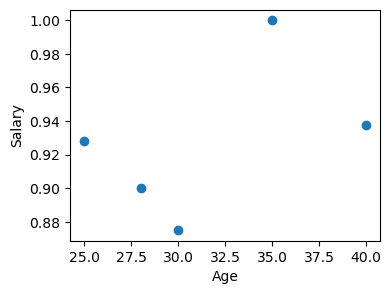

In [30]:
from matplotlib import pyplot as plt
plt.figure(figsize=(4, 3))
plt.scatter(df_with_header['age'], df_with_header['salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


## Regression plot

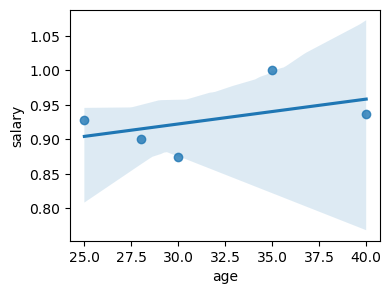

In [32]:
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.regplot(x='age', y='salary', data=df_with_header)
plt.show()


# Box plot

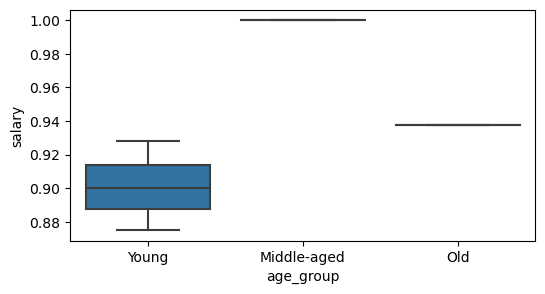

In [36]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='age_group', y='salary', data=df_with_header)
plt.show()


## Grouping by Attributes

In [37]:
df_group = df_with_header[['age', 'salary']]
df_group

,age,salary
0,30,0.875000
1,25,0.928125
2,35,1.000000
3,40,0.937500
4,28,0.900000


# GroupBy 

In [42]:
# Group by a single attribute
df_group_single = df_with_header.groupby(['city'], as_index=False)


In [43]:
# Group by multiple attributes
df_group_multiple = df_with_header.groupby(['city', 'age_group'], as_index=False)


## Pivot Tables

In [44]:
grouped_pivot = df_with_header.pivot(index='city', columns='age_group', values='salary')
grouped_pivot


age_group,Young,Middle-aged,Old
city,,,
Houston,NaN,NaN,0.9375
Los Angeles,0.928125,NaN,NaN
New York,0.875000,1.0,NaN
San Francisco,0.900000,NaN,NaN


## Pseudocolor Plot

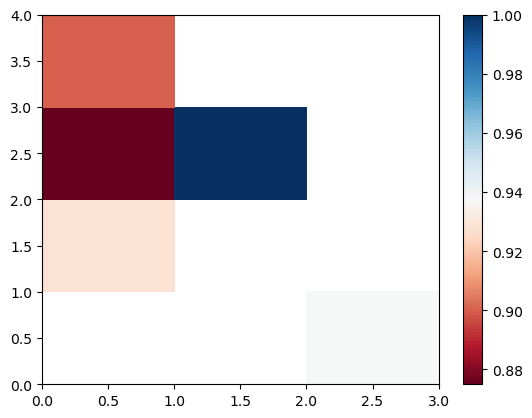

In [45]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()


## Pearson Coefficient and p-value

In [46]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df_with_header['age'], df_with_header['salary'])
print(f"Pearson Coefficient: {pearson_coef}, P-value: {p_value}")


Pearson Coefficient: 0.4552262863496618, P-value: 0.44108043220312154


**Created By**                                                                             

**Khushboo Alvi, Data Scientist**